<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/RefllectionCoef_Metamat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

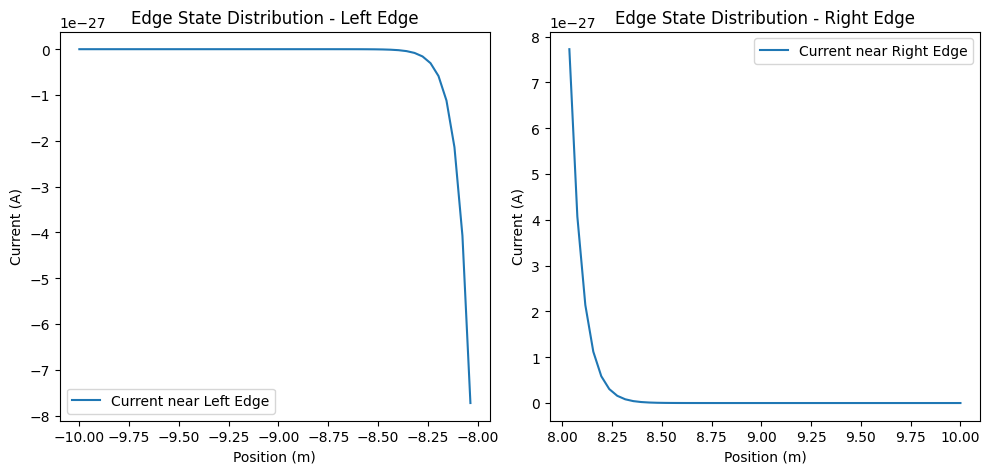

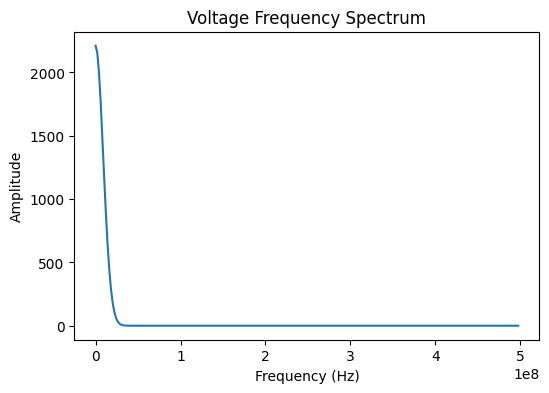

<ipython-input-1-5dd1763a79fa>:81: RuntimeWarning: divide by zero encountered in divide
  Z_in = V / I  # Simulated input impedance (simplification)
<ipython-input-1-5dd1763a79fa>:81: RuntimeWarning: invalid value encountered in divide
  Z_in = V / I  # Simulated input impedance (simplification)
<ipython-input-1-5dd1763a79fa>:82: RuntimeWarning: invalid value encountered in divide
  reflection_coefficient = (Z_in - Z_0) / (Z_in + Z_0)


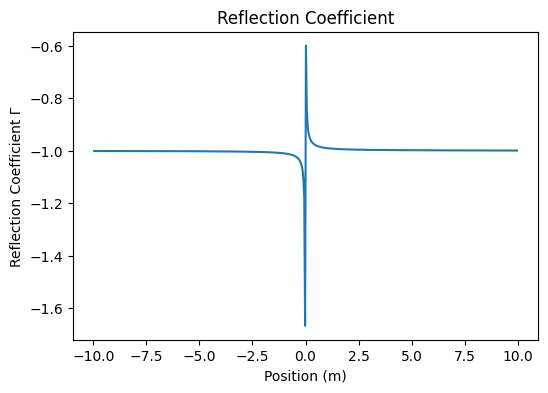

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.constants import mu_0

# Define parameters and initial conditions
L = 1e-5  # Inductance (H/m)
C = 1e-11  # Capacitance (F/m)
V0 = 50.0  # Initial voltage amplitude (V)
sigma = 1.0  # Width of the initial pulse
ig = 50.0  # Coupling constant for gauge interaction

# Define space and time range with more focus on edges
x_range = np.linspace(-10, 10, 500)  # Space (m)
t_range = np.linspace(0, 1e-6, 1000)  # Time (s)

# Initialize fields
V = np.zeros((len(t_range), len(x_range)))
I = np.zeros((len(t_range), len(x_range)))
A_mu = np.zeros((len(t_range), len(x_range)))  # Vector potential

# Initial condition for voltage
V[0, :] = V0 * np.exp(-x_range**2 / sigma**2)

# Finite difference method for propagation
dx = x_range[1] - x_range[0]
dt = t_range[1] - t_range[0]
c1 = dt / L
c2 = dt * C

for n in range(len(t_range) - 1):
    for i in range(1, len(x_range) - 1):
        dV_dx = (V[n, i + 1] - V[n, i - 1]) / (2 * dx)
        dI_dx = (I[n, i + 1] - I[n, i - 1]) / (2 * dx)

        # Covariant derivative for current and voltage
        D_mu_I = dV_dx + ig * A_mu[n, i] * V[n, i]
        D_mu_V = dI_dx + ig * A_mu[n, i] * I[n, i]

        I[n + 1, i] = I[n, i] - c1 * D_mu_I
        V[n + 1, i] = V[n, i] - c2 * D_mu_V

        # Update vector potential
        A_mu[n + 1, i] = A_mu[n, i] + mu_0 * I[n, i] * dt

# Plotting edge state distribution
plt.figure(figsize=(10, 5))

# Plot current near the left edge
plt.subplot(1, 2, 1)
plt.plot(x_range[:50], I[-1, :50], label='Current near Left Edge')
plt.xlabel('Position (m)')
plt.ylabel('Current (A)')
plt.title('Edge State Distribution - Left Edge')
plt.legend()

# Plot current near the right edge
plt.subplot(1, 2, 2)
plt.plot(x_range[-50:], I[-1, -50:], label='Current near Right Edge')
plt.xlabel('Position (m)')
plt.ylabel('Current (A)')
plt.title('Edge State Distribution - Right Edge')
plt.legend()

plt.tight_layout()
plt.show()

# Fourier analysis to study the frequency domain
V_fft = fft(V[-1, :])
frequencies = np.fft.fftfreq(len(V_fft), dt)

plt.figure(figsize=(6, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(V_fft)[:len(frequencies)//2])
plt.title("Voltage Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

# Impedance and reflection coefficient
Z_0 = np.sqrt(L / C)  # Characteristic impedance
Z_in = V / I  # Simulated input impedance (simplification)
reflection_coefficient = (Z_in - Z_0) / (Z_in + Z_0)

# Plot reflection coefficient
plt.figure(figsize=(6, 4))
plt.plot(x_range, reflection_coefficient[-1, :])
plt.title("Reflection Coefficient")
plt.xlabel("Position (m)")
plt.ylabel("Reflection Coefficient Γ")
plt.show()
